# PCA


In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [36]:
data = pd.read_csv('Data/DATA_Housing_Prices.csv')

In [37]:
# Let's construct a dataframe with this features
data['Antiquity'] = data['YrSold'] - data['YearRemodAdd']

X = data.drop(columns=['Id','SalePrice','YearBuilt', 'YearRemodAdd', 'YrSold',
                       'LotFrontage','MasVnrArea','GarageYrBlt'], axis = 1)
y = np.log(data['SalePrice'])

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Antiquity
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,6
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,36
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8


In [38]:
X_cols = X.select_dtypes(include=np.number).columns
X = X.select_dtypes(include=np.number)

X.head()

,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Antiquity
0,60,8450,7,5,706,0,150,856,856,854,...,548,0,61,0,0,0,0,0,2,5
1,20,9600,6,8,978,0,284,1262,1262,0,...,460,298,0,0,0,0,0,0,5,31
2,60,11250,7,5,486,0,434,920,920,866,...,608,0,42,0,0,0,0,0,9,6
3,70,9550,7,5,216,0,540,756,961,756,...,642,0,35,272,0,0,0,0,2,36
4,60,14260,8,5,655,0,490,1145,1145,1053,...,836,192,84,0,0,0,0,0,12,8


In [39]:
X.isna().sum()

MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
Antiquity        0
dtype: int64

# Scaling the data before PCA

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns = X.columns)
X_test  = pd.DataFrame(X_test , columns = X.columns)

In [41]:
X_train.shape

(1168, 31)

In [43]:
X_train

,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Antiquity
0,-0.866764,-0.212896,-0.820445,0.372217,1.037269,-0.285504,-0.400282,0.572612,0.374235,-0.801923,...,-0.863837,1.188402,-0.714352,-0.351921,-0.121008,-0.275838,-0.070993,-0.09274,-0.133417,1.452679
1,0.074110,-0.265245,-0.088934,1.268609,-0.971996,-0.285504,0.511920,-0.596547,-0.958202,0.955088,...,-0.456264,-0.740157,-0.138015,-0.351921,-0.121008,-0.275838,-0.070993,-0.09274,-0.508010,-0.382563
2,-0.631546,-0.177841,-0.820445,1.268609,-0.971996,-0.285504,0.505196,-0.603357,-0.965964,-0.801923,...,-2.257169,1.790113,-0.714352,2.290826,-0.121008,-0.275838,-0.070993,-0.09274,-0.508010,1.694159
3,-0.161109,-0.324474,-0.820445,1.268609,0.267995,-0.285504,-0.915776,-0.750921,-0.487321,0.989227,...,-1.119755,-0.740157,-0.714352,3.902257,-0.121008,-0.275838,-0.070993,-0.09274,-0.133417,1.645863
4,-0.161109,-0.529035,-0.820445,0.372217,-0.496920,-0.285504,0.532091,-0.081209,-0.370895,0.711564,...,-0.797488,-0.740157,-0.714352,3.547742,-0.121008,-0.275838,-0.070993,-0.09274,-0.508010,1.790750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,-0.866764,-0.127631,-0.088934,-0.524174,-0.919694,-0.285504,1.612389,0.572612,0.374235,-0.801923,...,-0.171910,-0.740157,-0.397367,-0.351921,-0.121008,-0.275838,-0.070993,-0.09274,-1.257196,-1.058704
1164,-0.161109,-0.268313,-1.551955,-2.316957,0.383495,-0.285504,-0.158223,0.136732,0.410457,0.684253,...,0.472624,2.584680,-0.080381,-0.351921,-0.121008,-0.275838,-0.070993,-0.09274,2.114141,1.742454
1165,-0.866764,-0.234096,-0.820445,1.268609,-0.608062,-0.285504,0.283309,-0.448983,-0.790030,-0.801923,...,0.453667,-0.740157,-0.714352,-0.351921,-0.121008,-0.275838,-0.070993,-0.09274,-0.882603,-0.334267
1166,-0.161109,-0.283376,0.642577,2.165000,-0.971996,-0.285504,0.765184,-0.340013,-0.665842,0.367900,...,-1.233497,-0.740157,2.743670,-0.351921,-0.121008,-0.275838,-0.070993,-0.09274,-0.133417,-0.672338


# Performing PCA

In [44]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver='full')

pca.fit(X_train)

X_train = pca.transform(X_train)
X_test  = pca.transform(X_test)

cols = [ 'PCA_' + str(i) for i in list(range(1,len(X.columns)+1))]

X_train = pd.DataFrame(X_train, columns = cols)
X_test  = pd.DataFrame(X_test , columns = cols)

#X_train = pd.DataFrame(X_train, columns = X.columns)
#X_test  = pd.DataFrame(X_test , columns = X.columns)

In [50]:
X_train= X_train.iloc[:,:14]

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14
0,-1.831949,1.958218,0.786292,0.935775,0.546249,0.195964,0.451519,-0.143039,-0.775133,0.150858,-1.352208,-0.469618,-0.019202,-0.249586
1,0.014032,-2.090796,-0.368208,-0.928789,-1.076340,-0.192240,0.272721,0.135859,-0.080727,0.497065,0.064120,-0.256612,-0.123732,-0.239044
2,-4.517982,0.042709,-0.454717,1.332889,-0.889459,-0.312530,1.910311,-0.623448,-0.095808,0.526512,-1.158443,0.438451,0.307076,0.269543
3,-1.454531,-1.147408,2.907253,1.167000,-0.766471,-1.552878,1.271504,0.005446,-1.731429,0.716110,0.678641,2.467581,0.231160,-0.961774
4,-1.522270,-1.472269,-0.102242,2.078073,-0.099935,-1.309608,1.400255,-0.199706,-0.725767,0.343235,0.834798,1.741941,0.651113,-0.508660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,0.228474,0.324550,-2.596161,0.608154,-0.196145,-0.649210,0.357724,-0.071084,0.190081,0.356636,0.046859,-0.968069,0.220252,-0.070248
1164,1.474337,0.140566,1.139212,1.067441,1.184502,0.661741,-1.131747,-1.607441,-1.800929,-0.345319,-1.293105,0.127466,0.830569,0.157420
1165,-2.276094,1.411893,-0.871750,-0.730627,-0.197229,-0.257730,0.717455,0.235341,0.234732,0.477766,0.406216,-0.146704,-0.840736,-0.731845
1166,-0.429466,-1.629289,-0.313814,-0.641315,-2.316270,-0.374665,-0.088372,1.244949,0.349069,0.181397,-1.744196,0.544816,-0.383266,1.045425


# Getting variances

In [14]:
# Getting
print(pca.explained_variance_ratio_) # Individual variances of each principal components
#print(pca.singular_values_)

[1.94659261e-01 1.00316171e-01 6.69947183e-02 5.71372532e-02
 4.72736923e-02 3.84978620e-02 3.62225870e-02 3.44910781e-02
 3.40617359e-02 3.35036791e-02 3.20660391e-02 3.07060878e-02
 3.02706523e-02 2.93527314e-02 2.84953477e-02 2.79779428e-02
 2.63580721e-02 2.43060938e-02 2.13308972e-02 2.01356327e-02
 1.83437422e-02 1.47261290e-02 1.27574356e-02 9.47236245e-03
 8.64702588e-03 8.20070843e-03 6.22698369e-03 4.27617333e-03
 3.19190464e-03 3.83897702e-32 1.06676883e-33]


In [31]:
variances = pca.explained_variance_ratio_.tolist()

In [32]:
variances[:2]

[0.19465926070219858, 0.10031617149771914]

In [34]:
total_variance = [sum(variances[:i]) for i in range(1, len(variances)+1)]
scree = pd.DataFrame({'num_pca': range(1,len(variances)+1),'variance': variances,'cum_variance': total_variance})
scree.head(10)

,num_pca,variance,cum_variance
0,1,0.194659,0.194659
1,2,0.100316,0.294975
2,3,0.066995,0.361970
3,4,0.057137,0.419107
4,5,0.047274,0.466381
5,6,0.038498,0.504879
6,7,0.036223,0.541102
7,8,0.034491,0.575593
8,9,0.034062,0.609654
9,10,0.033504,0.643158


<AxesSubplot:xlabel='num_pca', ylabel='cum_variance'>

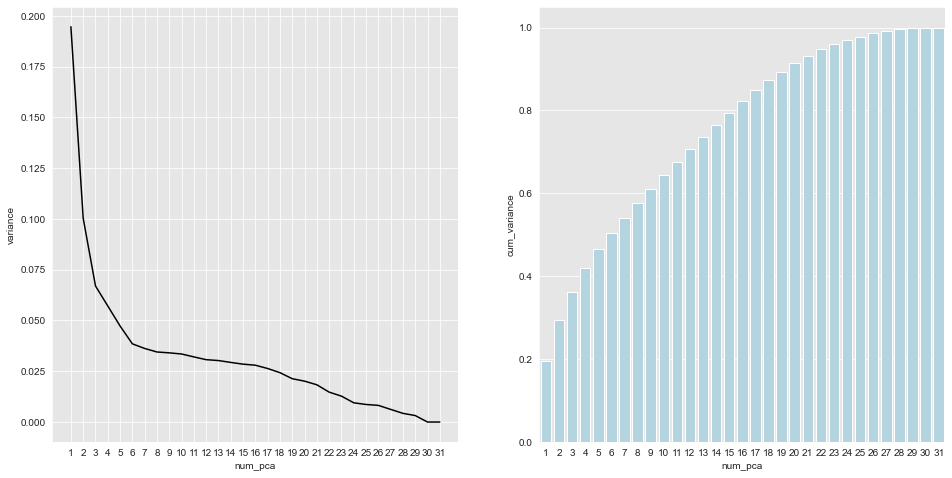

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

fig, ax = plt.subplots(1,2,figsize=(16,8))

sns.lineplot(x="num_pca", y="variance", data=scree, ax = ax[0], color = 'black')
ax[0].set_xticks(range(1,32))
sns.barplot(x="num_pca", y="cum_variance", data=scree, ax = ax[1], color = 'lightblue')

Here we have a very bad scenario. On the left plot it looks that there is an elbow at 6 pca's. However, with five principal components we are only able to explain

```
cum_variance[6] = 0.51
```

only 51% of the total variability of the data!!!

Bear in mind that we only selected the numerical columns and we didn't take into account the categorical ones. 


# Getting the pca coeficients

In [19]:
pca.components_

array([[-9.14713738e-03,  1.28792378e-01,  3.14050332e-01,
        -6.29542263e-02,  1.31427582e-01, -2.64919876e-03,
         1.37500548e-01,  2.75237858e-01,  2.81649735e-01,
         1.73712608e-01,  8.00261205e-03,  3.54000077e-01,
         6.59566344e-02, -2.15633545e-02,  2.85001973e-01,
         1.38341449e-01,  1.50258245e-01,  7.17777997e-04,
         2.90969002e-01,  2.11476886e-01,  2.95399118e-01,
         2.92682652e-01,  1.49070934e-01,  1.64438398e-01,
        -6.45910546e-02,  1.44426458e-02,  4.92544571e-02,
         7.64019965e-02, -8.27103988e-03,  2.96048546e-02,
        -2.02472006e-01],
       [-2.25547911e-01,  1.08069604e-01,  3.23941945e-02,
        -3.48087395e-02,  3.50187356e-01,  1.08754165e-01,
        -1.08891288e-01,  2.93554348e-01,  2.56392526e-01,
        -4.21147781e-01, -9.29905976e-02, -1.72446725e-01,
         3.18995527e-01,  1.44416659e-02, -1.47839154e-01,
        -2.28361740e-01, -3.09026545e-01, -1.77943765e-01,
        -2.65695840e-01,  5.84

In [20]:
# Fisrt pca components
pca.components_[0,:]

array([-0.00914714,  0.12879238,  0.31405033, -0.06295423,  0.13142758,
       -0.0026492 ,  0.13750055,  0.27523786,  0.28164973,  0.17371261,
        0.00800261,  0.35400008,  0.06595663, -0.02156335,  0.28500197,
        0.13834145,  0.15025824,  0.00071778,  0.290969  ,  0.21147689,
        0.29539912,  0.29268265,  0.14907093,  0.1644384 , -0.06459105,
        0.01444265,  0.04925446,  0.076402  , -0.00827104,  0.02960485,
       -0.20247201])

In [47]:
for comp in range(1,len(pca.components_)+1):
    print("Principal component ",comp)
    my_list = [(abs(value),index+1,X.columns[index],value) for index,value in enumerate(pca.components_[comp-1,:]) ]
    my_list.sort(reverse=True)
    my_list = [(elem[1],elem[2],round(elem[3],2)) for elem in my_list]
    print(my_list)
    print()

Principal component  1
[(12, 'GrLivArea', 0.35), (3, 'OverallQual', 0.31), (21, 'GarageCars', 0.3), (22, 'GarageArea', 0.29), (19, 'TotRmsAbvGrd', 0.29), (15, 'FullBath', 0.29), (9, '1stFlrSF', 0.28), (8, 'TotalBsmtSF', 0.28), (20, 'Fireplaces', 0.21), (31, 'Antiquity', -0.2), (10, '2ndFlrSF', 0.17), (24, 'OpenPorchSF', 0.16), (17, 'BedroomAbvGr', 0.15), (23, 'WoodDeckSF', 0.15), (16, 'HalfBath', 0.14), (7, 'BsmtUnfSF', 0.14), (5, 'BsmtFinSF1', 0.13), (2, 'LotArea', 0.13), (28, 'PoolArea', 0.08), (13, 'BsmtFullBath', 0.07), (25, 'EnclosedPorch', -0.06), (4, 'OverallCond', -0.06), (27, 'ScreenPorch', 0.05), (30, 'MoSold', 0.03), (14, 'BsmtHalfBath', -0.02), (26, '3SsnPorch', 0.01), (1, 'MSSubClass', -0.01), (29, 'MiscVal', -0.01), (11, 'LowQualFinSF', 0.01), (6, 'BsmtFinSF2', -0.0), (18, 'KitchenAbvGr', 0.0)]

Principal component  2
[(10, '2ndFlrSF', -0.42), (5, 'BsmtFinSF1', 0.35), (13, 'BsmtFullBath', 0.32), (17, 'BedroomAbvGr', -0.31), (8, 'TotalBsmtSF', 0.29), (19, 'TotRmsAbvGrd', -

# Generating a regression model with the pca

In [52]:
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker

def show_errors(y_real_train, y_pred_train, y_real_test, y_pred_test):

    plt.style.use('seaborn') 

    fig, ax = plt.subplots(2,2,figsize=(10,10))
    
    ax[0,0].scatter(x = np.exp(y_real_train), y = np.exp(y_pred_train), c = 'green')
    ax[0,0].plot([0,700000], [0,700000], linestyle = '--',c = 'black')
    ax[0,0].set_xlim(0,700000)
    ax[0,0].set_ylim(0,700000)

    ax[0,0].xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[0,0].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[0,0].set_title('Train set')

    ax[0,1].hist(x = np.exp(y_real_train)-np.exp(y_pred_train), bins = 50,color = 'green')
    ax[0,1].set_xlim(-200000,200000)
    ax[0,1].xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[0,1].set_title('Train set')

    ax[1,0].scatter(x = np.exp(y_real_test), y = np.exp(y_pred_test), c = 'blue')
    ax[1,0].plot([0,700000], [0,700000], linestyle = '--',c = 'black')
    ax[1,0].set_xlim(0,700000)
    ax[1,0].set_ylim(0,700000)
    ax[1,0].xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[1,0].yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[1,0].set_title('Test set')   

    ax[1,1].hist(x = np.exp(y_real_test)-np.exp(y_pred_test), bins = 50,color = 'blue')
    ax[1,1].set_xlim(-200000,200000)
    ax[1,1].xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x/1000)}K'))
    ax[1,1].set_title('Test set')

    fig.tight_layout()
    pass

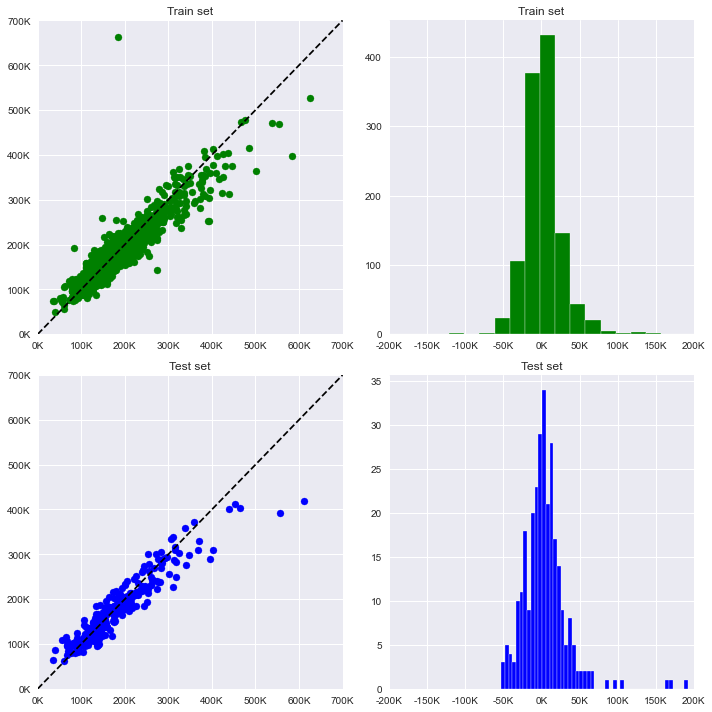

In [53]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

y_pred_train = lm.predict(X_train)
y_pred_test  = lm.predict(X_test)

show_errors(y_train, y_pred_train, y_test, y_pred_test)

In [56]:
lm.score(X_test,y_test)

0.8659232273182965

In [59]:
r2_score(y_train,y_pred_train)

0.8516004086026332

In [22]:
#sns.pairplot(6)